In [2]:
# in order to install the required packages for the snn conversion, 
# you need the following packages
# furthemore you must have installed miniconda or anaconda
# and activated a virtual environment to execute the following commands

# %conda install akida
# %conda install cnn2snn
# %conda install akida-models

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

h:\Programme\Miniconda\envs\studienarbeit\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Akida specific imports
from akida import Model

In [20]:
import linecache
import re
import os

FILEDIR = "B:/Benutzer/Filip Milak/Downloads/wider_face_split/"

file = open(FILEDIR + 'wider_face_val_bbx_gt.txt', 'r')

def count_lines(file):
    lines_quantity = 0
    while True:
        buffer = file.read(1024 * 8192)
        if not buffer:
            break
        lines_quantity += buffer.count('\n')
    file.close()
    return lines_quantity


lines = count_lines(file)

for i in range(lines):
    line = linecache.getline(FILEDIR + 'wider_face_val_bbx_gt.txt', i)
    if re.search('jpg', line):
        position = line.index('/')
        file_name = line[position + 1: -5]
        folder_name = line[:position]
        print(file_name)
        i += 1
        face_count = int(linecache.getline(FILEDIR + 'wider_face_val_bbx_gt.txt', i))
        
        j = 0
        
        for j in range(face_count):
            box_line = linecache.getline(FILEDIR + 'wider_face_val_bbx_gt.txt',i + j + 1)  # x1, y1, w, h, x1,y1 
            po_x1 = box_line.index(' ')
            x1 = box_line[:po_x1]
            po_y1 = box_line.index(' ', po_x1 + 1)
            y1 = box_line[po_x1:po_y1]
            po_w = box_line.index(' ', po_y1 + 1)
            w = box_line[po_y1:po_w]
            po_h = box_line.index(' ', po_w + 1)
            h = box_line[po_w:po_h]
            coordinates = x1 + y1 + w + h
            # print(coordinates)
            if not (os.path.exists(FILEDIR + "wider_face_val\\" + folder_name)):
                os.makedirs(FILEDIR + "wider_face_val\\" + folder_name)
            with open(FILEDIR + "wider_face_val\\" + folder_name + "\\" + file_name + ".txt", 'a') as f:
                f.write(coordinates + "\n")
        i += i + j + 1

0_Parade_marchingband_1_465
0_Parade_Parade_0_628
0_Parade_marchingband_1_765
0_Parade_Parade_0_194
0_Parade_marchingband_1_379
0_Parade_Parade_0_814
0_Parade_Parade_0_470
0_Parade_marchingband_1_1045
0_Parade_marchingband_1_556
0_Parade_Parade_0_829
0_Parade_marchingband_1_593
0_Parade_Parade_0_29
0_Parade_Parade_0_72
0_Parade_Parade_0_205
0_Parade_marchingband_1_881
0_Parade_marchingband_1_490
0_Parade_Parade_0_125
0_Parade_Parade_0_120
0_Parade_marchingband_1_476
0_Parade_marchingband_1_620
0_Parade_Parade_0_960
0_Parade_marchingband_1_488
0_Parade_Parade_0_901
0_Parade_marchingband_1_822
0_Parade_marchingband_1_353
0_Parade_marchingband_1_74
0_Parade_marchingband_1_234
0_Parade_marchingband_1_359
0_Parade_Parade_0_266
0_Parade_Parade_0_275
0_Parade_Parade_0_478
0_Parade_Parade_0_913
0_Parade_marchingband_1_172
0_Parade_marchingband_1_309
0_Parade_marchingband_1_360
0_Parade_Parade_0_472
0_Parade_marchingband_1_517
0_Parade_marchingband_1_188
0_Parade_Parade_0_917
0_Parade_Parade_0_

In [22]:
import os
import json

FILEDIR = "B:\Benutzer\Filip Milak\Downloads\wider_face_split\wider_face_val"

for filelist in os.walk(FILEDIR):
    for file_dir in filelist[1]:
        for subfilelist in os.walk(''.join([FILEDIR, "/", file_dir])):
            for file in subfilelist[2]:
                if file.endswith(".txt"):
                    with open(''.join([FILEDIR, "/", file_dir, "/", file]), 'r') as txtfile:
                        dict = {}
                        for i, line in enumerate(txtfile.readlines()):
                            num = line.split(' ')
                            dict[i] = {
                                'x': [int(num[0]), int(num[0]) + int(num[2]), int(num[0]) + int(num[2]), int(num[0])],
                                'y': [int(num[1]), int(num[1]), int(num[1]) + int(num[3]), int(num[1]) + int(num[3])]
                            }
                        with open(''.join([FILEDIR, "/", file_dir, "/", file[:-4], ".json"]), 'w+') as jsonfile:
                            jsonfile.write(json.dumps(dict))
                        jsonfile.close()
                    txtfile.close()

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

h:\Programme\Miniconda\envs\studienarbeit\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Akida specific imports
from akida import Model

In [ ]:
ds_train, ds_info = tfds.load('wider_face', split='train', shuffle_files=True, with_info=True)

,faces/bbox,faces/blur,faces/expression,faces/illumination,faces/invalid,faces/occlusion,faces/pose,image,image/filename
0,,111000,FalseFalseFalseFalseFalseFalse,FalseFalseTrueFalseFalseFalse,FalseFalseFalseFalseFalseFalse,001000,TrueFalseFalseTrueFalseFalse,,54--Rescue/54_Rescue_rescuepeople_54_631.jpg

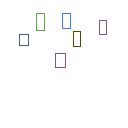
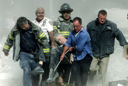

In [ ]:
tfds.as_dataframe(ds_train.take(1),ds_info)

In [ ]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

In [ ]:
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

TypeError: in user code:


    TypeError: outer_factory.<locals>.inner_factory.<locals>.tf__normalize_img() missing 1 required positional argument: 'label'


In [ ]:
from akida_models import akidanet_imagenet_pretrained

# Use a quantized model with pretrained quantized weights
model_keras_quantized_pretrained = akidanet_imagenet_pretrained(0.5)
model_keras_quantized_pretrained.summary()

In [4]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

In [5]:
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

TypeError: in user code:


    TypeError: outer_factory.<locals>.inner_factory.<locals>.tf__normalize_img() missing 1 required positional argument: 'label'


In [ ]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
from akida_models import akidanet_imagenet_pretrained

# Use a quantized model with pretrained quantized weights
model_keras_quantized_pretrained = akidanet_imagenet_pretrained(0.5)
model_keras_quantized_pretrained.summary()